# Create Layer with topological specifications and distributions.

**(Connect the layer with itself)**

**Basic Imports**

In [1]:
import nest
import nest.topology as topology

nest.ResetKernel()

**Creating and connecting a simple layer with itself**

In [2]:
layer = topology.CreateLayer({
    "rows":5,
    "columns":5,
    "elements":"iaf_psc_alpha"
})

projection = {
    "connection_type":"divergent",
    "mask":{
        "circular" :{ 
            "radius":0.3
        }
    },
    'kernel': {
        'gaussian': {
            'p_center': 1.0, 
            'sigma': 0.15
        }
    }
}

topology.ConnectLayers(layer, layer, projection)

**Now we want to visualize our layer and the connections**

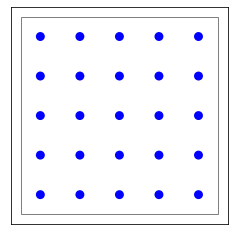

In [3]:
fig = topology.PlotLayer(layer, nodesize=80)


**Take central neuron and mark target neurons (connections)**

/home/juanmav/anaconda3/envs/spiking/lib/python3.7/site-packages/nest/lib/hl_api_helper.py:127: UserWarning:
GetChilden is deprecated and will be removed in NEST 3.0. Use             GIDCollection instead.


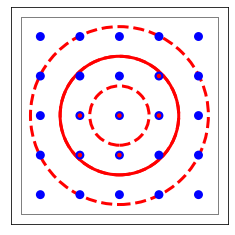

<Figure size 432x288 with 0 Axes>

In [4]:
center = topology.FindCenterElement(layer)

topology.PlotTargets(
    center, 
    layer, 
    fig=fig, 
    mask=projection["mask"], 
    kernel=projection["kernel"],
    tgt_color='red'
)

## Off Grid Neurons, creating spatial position with slightly random position

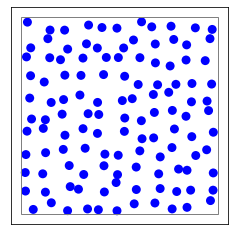

In [5]:
import numpy as np

# grid with jitter
jit = 0.03
xs = np.arange(-0.5,.501,0.1)
poss = [[x,y] for y in xs for x in xs]
poss = [[p[0]+np.random.uniform(-jit,jit),p[1]+np.random.uniform(-jit,jit)] for p in poss]

layer2 = topology.CreateLayer({
    "positions": poss,
    "extent" : [1.1,1.1],
    "elements" : "iaf_psc_alpha"
})

projection2 = {
    "connection_type":"divergent",
    "mask":{
        "circular" :{ 
            "radius":0.3
        }
    },
    'kernel': {
        'gaussian': {
            'p_center': 1.0, 
            'sigma': 0.15
        }
    }
}

topology.ConnectLayers(layer2, layer2, projection2)

fig = topology.PlotLayer(layer2, nodesize=80)


**Pick one neuron and draw neighborhood.**

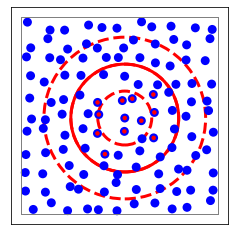

<Figure size 432x288 with 0 Axes>

In [6]:
center2 = topology.FindCenterElement(layer2)

topology.PlotTargets(
    center2, 
    layer2, 
    fig=fig,
    mask=projection2["mask"], 
    kernel=projection2["kernel"],
    tgt_color='red'
)

**Create a 3d layer off grid no connected just plot**

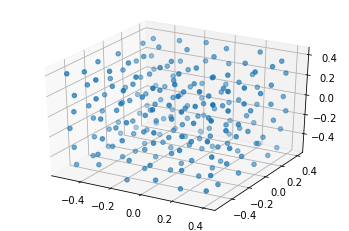

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# grid with jitter
jit = 0.03
xs = np.arange(-0.5,.501,0.175)
poss = [[x,y,z] for y in xs for x in xs for z in xs]
poss = [
    [
        p[0]+np.random.uniform(-jit,jit),
        p[1]+np.random.uniform(-jit,jit),
        p[2]+np.random.uniform(-jit,jit)
    ] 
    for p in poss
]

# The creation of the layer is not needed here, we are only
# visualizing the neurons distribution on our 3d layer.
layer3 = topology.CreateLayer({
    "positions": poss,
    "extent" : [1.1,1.1,1.1],
    "elements" : "iaf_psc_alpha"
})

fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = [item[0] for item in poss]
ydata = [item[1] for item in poss]
zdata = [item[2] for item in poss]

ax.scatter3D(xdata, ydata, zdata, cmap='Greens');